a) Import Libraries,Load Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Superstore.csv", encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


statistical values

In [18]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


removing nan vlues

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


 Data Cleaning

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


no of products

In [55]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


NumPy Calculations

In [21]:
sales_array = df['Sales'].values
print("Total Sales:", np.sum(sales_array))
print("Average Order Value:", np.mean(sales_array))
print("Sales Std Dev:", np.std(sales_array))


Total Sales: 2297200.8603000003
Average Order Value: 229.85800083049833
Sales Std Dev: 623.2139187650461


Monthly Sales Trend

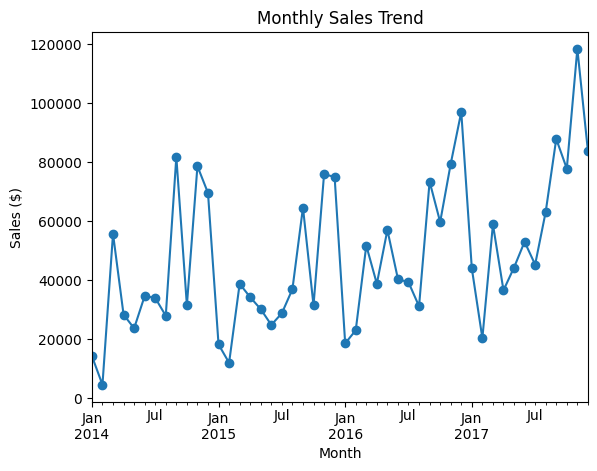

In [60]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.show()


monthly sales

In [52]:
monthly_sales = df.groupby('Month')['Sales'].max()
print(monthly_sales)

Month
2014-01     2573.820
2014-02     1256.220
2014-03    22638.480
2014-04     4164.050
2014-05     2715.930
2014-06     3266.376
2014-07     8187.650
2014-08     2060.744
2014-09     9449.950
2014-10     2735.952
2014-11     4548.810
2014-12     6999.960
2015-01     4297.644
2015-02     2541.980
2015-03     6354.950
2015-04     3812.970
2015-05     2973.320
2015-06     3050.376
2015-07     2309.650
2015-08     3080.000
2015-09     4228.704
2015-10     2453.430
2015-11     4643.800
2015-12     4899.930
2016-01     1592.850
2016-02     8749.950
2016-03     4912.590
2016-04     9099.930
2016-05     8399.976
2016-06     4476.800
2016-07     2799.960
2016-08     2887.056
2016-09     4355.168
2016-10    17499.950
2016-11     4499.985
2016-12     9892.740
2017-01     5443.960
2017-02     1640.700
2017-03    13999.960
2017-04     4799.984
2017-05     3359.952
2017-06     3404.500
2017-07     2399.960
2017-08     4416.174
2017-09     4663.736
2017-10    11199.968
2017-11    10499.970
2017-12

Top Products

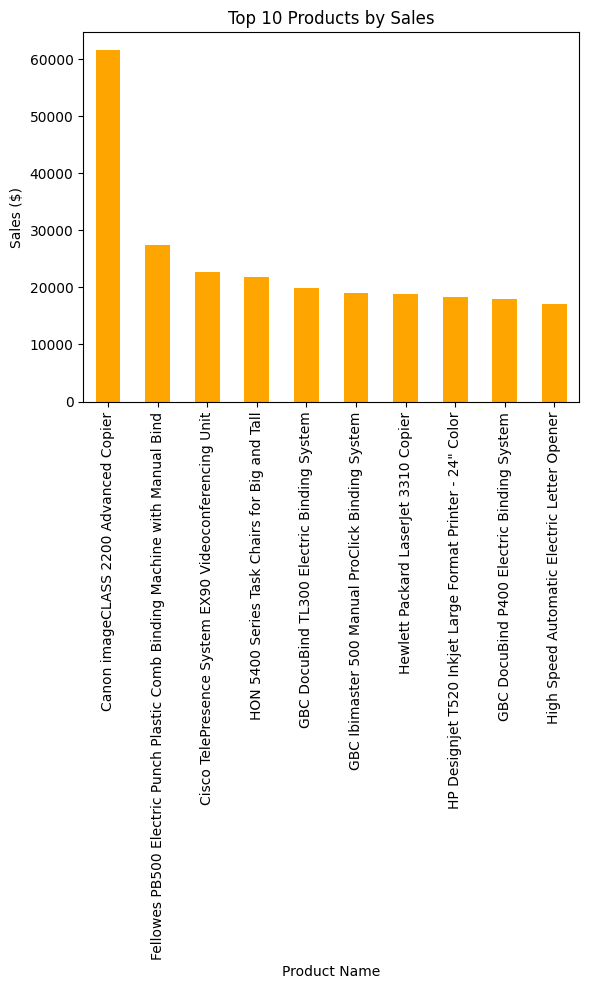

In [47]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='orange')
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales ($)")
plt.show()

least products

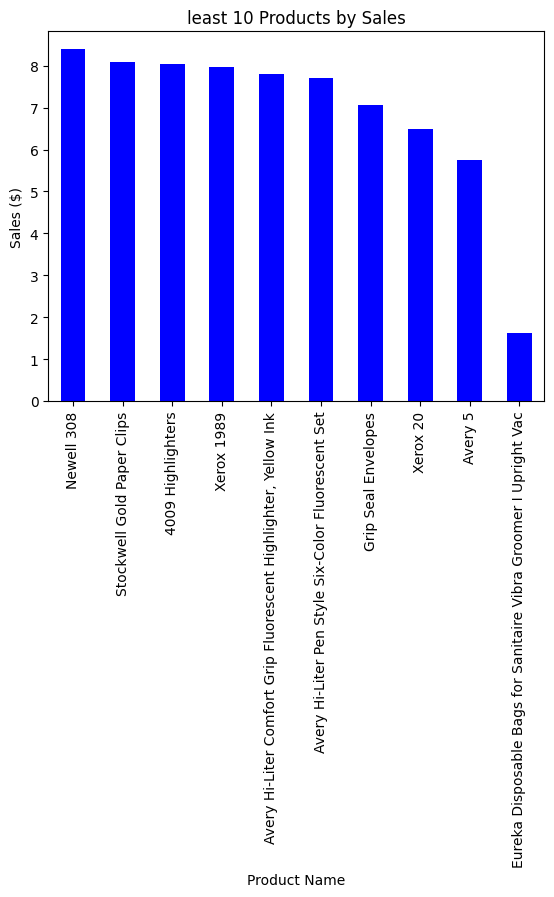

In [45]:
least_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).tail(10)
least_products.plot(kind='bar', color='blue')
plt.title("least 10 Products by Sales")
plt.ylabel("Sales ($)")
plt.show()


profit

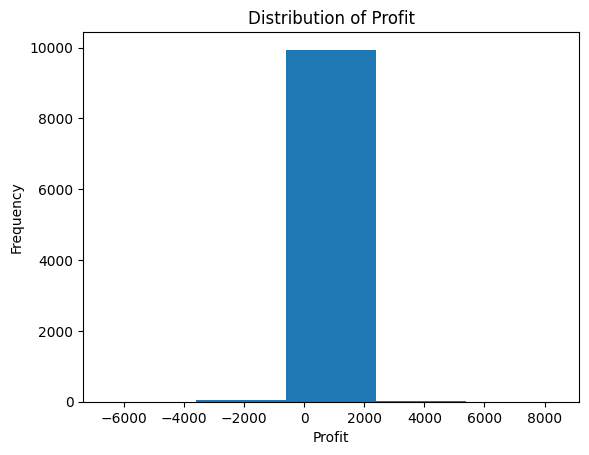

In [41]:
plt.hist(df["Profit"],bins=5)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

profit loss counts

In [31]:
sign_labels = df["Profit"].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Zero'))

# Count occurrences
counts = sign_labels.value_counts()
print(counts)

Profit
Positive    8058
Negative    1871
Zero          65
Name: count, dtype: int64


In [48]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
Grip Seal Envelopes,7.072
Xerox 20,6.480


sub category sales


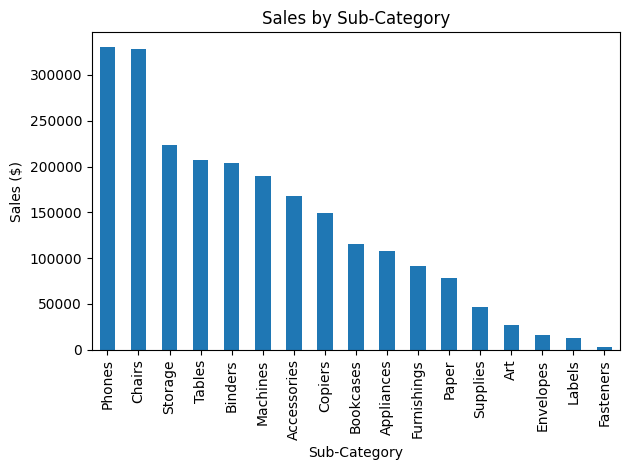

In [56]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sub_category_sales.plot(kind='bar')
plt.title("Sales by Sub-Category")
plt.ylabel("Sales ($)")
plt.xlabel("Sub-Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

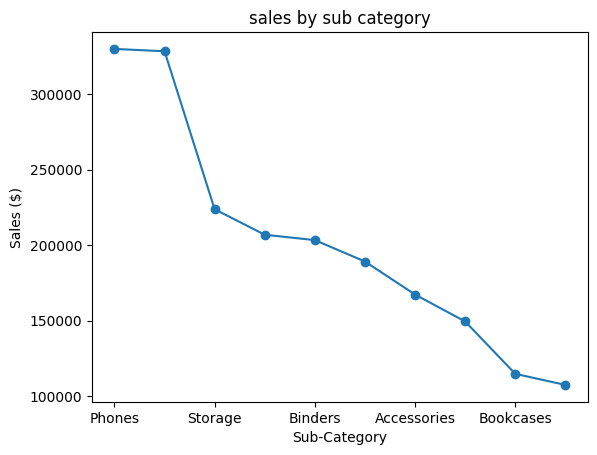

In [65]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

sub_category_sales.plot(kind='line', marker='o')
plt.title("sales by sub category")
plt.ylabel("Sales ($)")
plt.show()

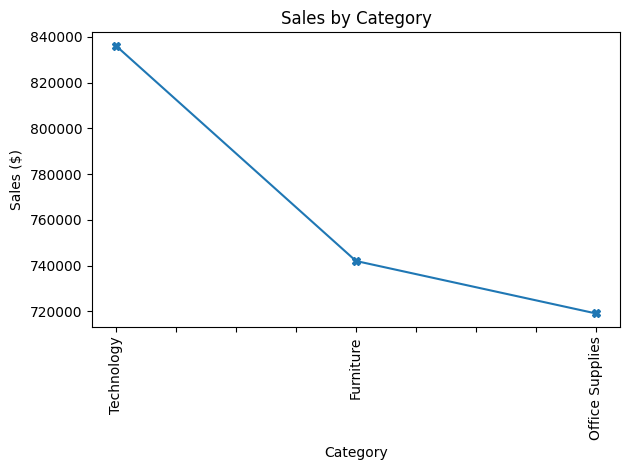

In [64]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='line',marker="X")
plt.title("Sales by Category")
plt.ylabel("Sales ($)")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()